In [1]:
import numpy as np
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt
import dendropy
import csv
from dendropy.calculate import treecompare
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Using TensorFlow backend.


# Loading Data

In [2]:
whole_data = np.load('/floyd/input/aiphylo/training_data.npy')
whole_labels_cub = np.load('/floyd/input/aiphylo/training_dists_cub.npy')
whole_labels_flatten = np.load('/floyd/input/aiphylo/training_dists_flatten.npy')

# whole_data = np.load('./../../Data_Preprocessing/output/Small_Dataset/training_data.npy')
# whole_labels_cub = np.load('./../../Data_Preprocessing/output/Small_Dataset/training_dists_cub.npy')
# whole_labels_flatten = np.load('./../../Data_Preprocessing/output/Small_Dataset/training_dists_flatten.npy')

zero_padding_array = np.zeros((500,100,600,1))

In [3]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM - 1) * BRANCH_NUM / 2)

In [4]:
whole_data.shape

(500, 100, 1000, 1)

In [5]:
whole_labels_flatten.shape

(500, 4950)

In [6]:
# zero_padding_array.shape

# Training Testing Dataset Partition

In [7]:
whole_data = np.concatenate([whole_data, zero_padding_array], axis=2)
print(whole_data.shape)
print(whole_labels_cub.shape)
print(whole_labels_flatten.shape)

samples_count = whole_data.shape[0]

train_size = math.floor(0.85*whole_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

print("######## Training Data ########")
X_train = whole_data[indices_train,:]
Y_train_cub = whole_labels_cub[indices_train]
Y_train_flatten = whole_labels_flatten[indices_train]

print("######## Validation Data ########")
X_test = whole_data[indices_test,:]
Y_test_cub = whole_labels_cub[indices_test]
Y_test_flatten = whole_labels_flatten[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', Y_train_cub.shape)

print('Y_train_cub.shape : ', Y_train_cub.shape)
print('Y_test_cub.shape : ', Y_test_cub.shape)
print('Y_train_flatten.shape : ', Y_train_flatten.shape)
print('Y_test_flatten.shape : ', Y_test_flatten.shape)# Training Testing Dataset Partition

(500, 100, 1600, 1)
(500, 100, 100, 1)
(500, 4950)
######## Training Data ########
######## Validation Data ########
X_train.shape :  (425, 100, 1600, 1)
X_test.shape :  (425, 100, 100, 1)
Y_train_cub.shape :  (425, 100, 100, 1)
Y_test_cub.shape :  (75, 100, 100, 1)
Y_train_flatten.shape :  (425, 4950)
Y_test_flatten.shape :  (75, 4950)


In [9]:
np.save('./output/X_train.npy', X_train)
np.save('./output/Y_train_cub.npy', Y_train_cub)
np.save('./output/Y_train_flatten.npy', Y_train_flatten)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test_cub.npy', Y_test_cub)
np.save('./output/Y_test_flatten.npy', Y_test_flatten)

### Load Data

In [10]:
# X_train = np.load('./output/X_train.npy')
# Y_train_cub = np.load('./output/Y_train_cub.npy')
# Y_train_flatten = np.load('./output/Y_train_flatten.npy')

# X_test = np.load('./output/X_test.npy')
# Y_test_cub = np.load('./output/Y_test_cub.npy')
# Y_test_flatten = np.load('./output/Y_test_flatten.npy')

In [11]:
# model = Sequential()

# # Layer 1
# model.add(Conv2D(64, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1), padding='same'))
# #model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 2
# model.add(Conv2D(32, (3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 3
# model.add(Conv2D(16, (3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 4
# model.add(Conv2D(1, (2, 1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(1, 2)))


In [12]:
model = Sequential()

# Layer 1
model.add(Conv2D(64, input_shape=(100,1600,1), kernel_size=(2,1), strides=(1,1), padding='same'))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 2
model.add(Conv2D(32, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 3
model.add(Conv2D(16, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 4
model.add(Conv2D(1, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 1600, 64)     192       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 1600, 64)     256       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 1600, 64)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 800, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 800, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 800, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 100, 800, 32)     

In [14]:
# def log_loss:
#     if not K.is_tensor(y_pred):
#         y_pred = K.constant(y_pred)
#     y_true = K.cast(y_true, y_pred.dtype)
    
#     return K.log(K.square(y_pred - y_true), axis=-1)

In [15]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])

In [16]:
loss_list_epoch= []
RF_avg_distance_epoch = []
RF_list_distance_epoch = []

In [15]:
## This function is defined for vector -> symmetric distance matrix
def utri2mat(utri):
    n = (int(-1 + np.sqrt(1 + 8*len(utri))) // 2) + 1
    iu1 = np.triu_indices(n-1)
    iu1 = (iu1[0], iu1[1] + 1)
    ret = np.zeros((n, n))
    ret[iu1] = utri
    ret.T[iu1] = utri
    return ret

In [19]:
Y_train_cub[0][0]

array([[0.       ],
       [0.212401 ],
       [0.240759 ],
       [0.150089 ],
       [0.154733 ],
       [0.167397 ],
       [0.167398 ],
       [0.172125 ],
       [0.167396 ],
       [0.194494 ],
       [0.176781 ],
       [0.187485 ],
       [0.181042 ],
       [0.176746 ],
       [0.171796 ],
       [0.198424 ],
       [0.186317 ],
       [0.157493 ],
       [0.157492 ],
       [0.146209 ],
       [0.158263 ],
       [0.140163 ],
       [0.185675 ],
       [0.179809 ],
       [0.227462 ],
       [0.203567 ],
       [0.152429 ],
       [0.211698 ],
       [0.157665 ],
       [0.158184 ],
       [0.134713 ],
       [0.0999047],
       [0.203439 ],
       [0.0797499],
       [0.0746787],
       [0.0937524],
       [0.129088 ],
       [0.165762 ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],


In [16]:
# (5) Train
# history = model.fit(X_train, Y_train_cub, validation_data=(X_test, Y_test_cub), batch_size=16, epochs=10, verbose=1)
for i in range(2):
    print("******** Start fitting model ********")
    history = model.fit(X_train, Y_train_cub, validation_data=(X_test, Y_test_cub), batch_size=50, epochs=1, verbose=1)
    print(history.history['loss'])
    loss_list_epoch.append(history.history['loss'][0])

    print("******** Start calculating RF Distance ********")
    RF_list_distance = []
    for index in range(len(X_train)):
        tips_num = np.count_nonzero(np.sum(X_train[index], axis=1) != 0) 
#         print("tips_num: ", tips_num)


#         array_selection_length = int((tips_num + 1) * tips_num / 2)
#         Y_train_flatten_vec_sel = Y_train_flatten[index][0:array_selection_length]
#         X_train_results = model.predict(X_train[index].reshape((1, 100, 1000, 1)))
#         X_train_results_vec_sel = X_train_results[0][0:array_selection_length]
#         original_dis_matrix = utri2mat(Y_train_flatten_vec_sel)
#         new_dis_matrix = utri2mat(X_train_results_vec_sel)
#         for i in range(len(new_dis_matrix)):
#             new_dis_matrix[i,i] = 0
#         with open('./output/CSV/original_dis_matrix'+str(index)+'.csv', mode='w') as my_csv:
#             csvWriter = csv.writer(my_csv,delimiter=',')
#             csvWriter.writerows(original_dis_matrix)
#         with open('./output/CSV/new_dis_matrix'+str(index)+'.csv', mode='w') as my_csv:
#             csvWriter = csv.writer(my_csv,delimiter=',')
#             csvWriter.writerows(new_dis_matrix)
#         taxon_namespace = dendropy.TaxonSet()
#         pdm_origin = dendropy.PhylogeneticDistanceMatrix.from_csv(
#                 src=open('./output/CSV/original_dis_matrix'+str(index)+'.csv'),
#                 is_first_row_column_names=False,
#                 is_first_column_row_names=False,
#                 delimiter=",",
#                 taxon_namespace = taxon_namespace)
#         pdm_new = dendropy.PhylogeneticDistanceMatrix.from_csv(
#                 src=open('./output/CSV/new_dis_matrix'+str(index)+'.csv'),
#                 is_first_row_column_names=False,
#                 is_first_column_row_names=False,
#                 delimiter=",",
#                 taxon_namespace = taxon_namespace)
#         tree_origin = pdm_origin.nj_tree()
#         tree_new = pdm_new.nj_tree()
#         RF_distance = treecompare.symmetric_difference(tree_origin, tree_new)
#         RF_list_distance.append(RF_distance)
#     RF_list_distance_epoch.append(RF_list_distance)
#     RF_avg_distance_epoch.append(sum(RF_list_distance) / len(RF_list_distance))
#     print("RF_list_distance: ", RF_list_distance)
#     print("RF_avg_distance_epoch: ", RF_avg_distance_epoch)

******** Start fitting model ********
Train on 425 samples, validate on 75 samples
Epoch 1/1
425/425 [==============================] - 73s 172ms/step - loss: 0.1557 - accuracy: 0.6471 - val_loss: 0.0854 - val_accuracy: 0.6414
[0.15567647884873784]
******** Start fitting model ********
Train on 425 samples, validate on 75 samples
Epoch 1/1
425/425 [==============================] - 71s 167ms/step - loss: 0.1200 - accuracy: 0.6476 - val_loss: 0.0856 - val_accuracy: 0.6409
[0.12001760041012484]


In [17]:
model.save('./output/CNN_model_03.h5')

In [19]:
train_result = model.evaluate(X_train, Y_train_cub)
test_result = model.evaluate(X_test, Y_test_cub)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 3s 38ms/step
Train Acc:  [0.08468735051505706, 0.6474223732948303]
Test Acc:  [0.08560724506775538, 0.640882670879364]


## Load the Model

In [20]:
# model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [21]:
X_train_results = model.predict(X_train)

In [25]:
train_show_index = 0
train_show_index_index = 0

Text(0, 0.5, 'Distance Matrix Value')

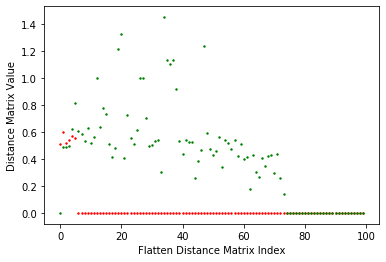

In [28]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index][train_show_index_index], c='r', s = 2)
plt.scatter(range(Y_train_cub[train_show_index].shape[0]), Y_train_cub[train_show_index][train_show_index_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

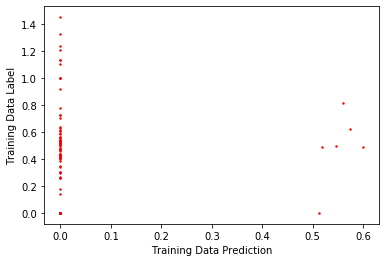

In [34]:
plt.scatter(X_train_results[train_show_index][train_show_index_index], Y_train_cub[train_show_index][train_show_index_index], c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

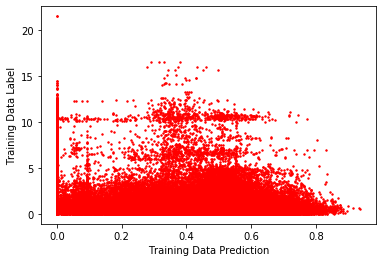

In [33]:
plt.scatter(X_train_results, Y_train_cub, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## X_test plot

In [36]:
X_test_results = model.predict(X_test)

In [35]:
test_show_index = 10
test_show_index_index = 0

Text(0, 0.5, 'Distance Matrix Value')

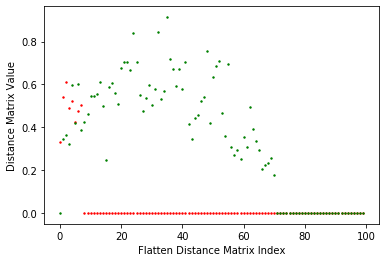

In [38]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[train_show_index][train_show_index_index], c='r', s = 2)
plt.scatter(range(Y_test_cub[test_show_index].shape[0]), Y_test_cub[train_show_index][train_show_index_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

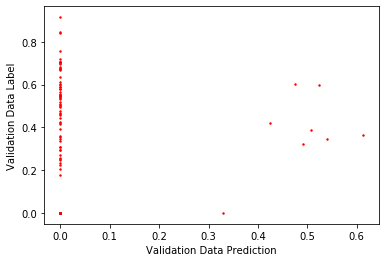

In [40]:
plt.scatter(X_test_results[train_show_index][train_show_index_index], Y_test_cub[train_show_index][train_show_index_index], c='r', s = 2)
plt.xlabel ('Validation Data Prediction')
plt.ylabel ('Validation Data Label')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

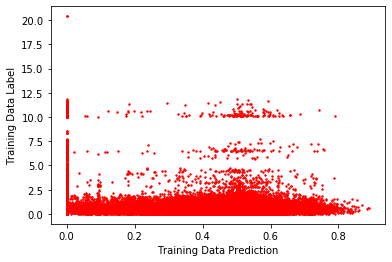

In [42]:
plt.scatter(X_test_results, Y_test_cub, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## Plot Loss 

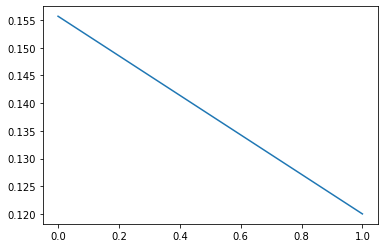

In [43]:
plt.plot(loss_list_epoch)
plt.show()

This is the loss plot for this model. I accidentally rerun the above cell and the output is erased, so I just put the result plot here.

![](https://i.imgur.com/4rqHApM.png)

## Plot RF distance

In [ ]:
for index in range(15):
    index_RF_dist = [each[index] for each in RF_list_distance_epoch]
    plt.plot(index_RF_dist)
    plt.xlabel ('Epochs Index')
    plt.ylabel ('RFR Distance')
    plt.show()

In [ ]:
plt.plot(RF_avg_distance_epoch)
plt.xlabel ('Epochs Index')
plt.ylabel ('RFR Distance')
plt.show()